# Exercício Visualização de Dados

**Dupla**: 

Gabriel Viana Raulino - 509291 

Kauan Oliveira Perdigão Lopes - 514867

Pergunta de pesquisa: **Quais bairros são mais afetados por problemas de infraestrutura?**


## **Considerações inicias:** 
### Foi utilizado um filtro no site do dataset para reduzir o tamanho do csv e remover previamente algumas informações desnecessárias.
### **Filtro 1**: Foi inserido apenas as ocorrências das datas entre 2020 Jan 01 12:00:00 AM a 2025 Jan 01 12:00:00 AM
### **Filtro 2**: Foi utilizado apenas as seguintes colunas
- **Created Date**
- **Complaint Type**
- **Location Type**
- **Street Name**
- **City**

In [1]:
import pandas as pd

df = pd.read_csv('311_Service.csv')

df

Created Date       Complaint Type  \
0         12/31/2024 11:59:38 PM    Illegal Fireworks   
1         12/31/2024 11:59:33 PM  Noise - Residential   
2         12/31/2024 11:59:32 PM  Noise - Residential   
3         12/31/2024 11:59:31 PM  Noise - Residential   
4         12/31/2024 11:59:21 PM  Noise - Residential   
...                          ...                  ...   
16016675  01/01/2020 12:00:00 AM       Food Poisoning   
16016676  01/01/2020 12:00:00 AM       Food Poisoning   
16016677  01/01/2020 12:00:00 AM       Food Poisoning   
16016678  01/01/2020 12:00:00 AM       Food Poisoning   
16016679  01/01/2020 12:00:00 AM       Food Poisoning   

                       Location Type          Street Name       City  
0                    Street/Sidewalk             AVENUE C        NaN  
1         Residential Building/House     EAST  230 STREET      BRONX  
2         Residential Building/House  MALCOLM X BOULEVARD   BROOKLYN  
3         Residential Building/House     EAST  230 STREET      BRONX  
4         Residential Building/House       NEWKIRK AVENUE   BROOKLYN  
...                              ...                  ...        ...  
16016675       Other (Explain Below)         UNION STREET   BROOKLYN  
16016676       Other (Explain Below)        CHURCH AVENUE   BROOKLYN  
16016677  Restaurant/Bar/Deli/Bakery      NOSTRAND AVENUE   BROOKLYN  
16016678  Restaurant/Bar/Deli/Bakery       JAMAICA AVENUE  Woodhaven  
16016679  Restaurant/Bar/Deli/Bakery      CORNELIA STREET  Ridgewood  

[16016680 rows x 5 columns]

#### Aqui podemos ver a quantidade de elementos null em cada coluna e a quantidade de valores únicos de cada coluna

In [ ]:
value_counts = df[['Created Date','Complaint Type', 'Location Type', 'Street Name', 'City']].isnull().sum()
print(value_counts)
unique_values = df[['Complaint Type', 'Location Type', 'Street Name', 'City']].nunique()
print(unique_values)


Created Date            0
Complaint Type          0
Location Type     2193372
Street Name        699039
City               860021
dtype: int64
Created Date      12793577
Complaint Type         266
Location Type          214
Street Name          19407
City                   548
dtype: int64


## Abaixo, foi feito um tratamento bem simples do dados faltantes 

Antes de iniciar foi feita uma conversão de tipo na coluna `Created Date` para que fosse possível agrupar no gráfico por datas.

Para Location Type e Street name utilizamos imputação com os valores mais frequentes.

Para completar a coluna `City` a qual se refere dos bairros, foi feito um tratamento em que fizemos uma associação dos valores de `Street Name` para completar os nomes dos bairros, uma vez que sabendo o nome da rua é mais fácil de inferir o nome do bairro

In [ ]:
import warnings
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

warnings.filterwarnings('ignore')

# Converter a coluna "Created Date" para o formato de data
df['Created Date'] = pd.to_datetime(df['Created Date'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')



df['Location Type'] = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])
df['Street Name'] = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])

# Criar um dicionário de mapeamento "Street Name" -> "City" com a cidade mais frequente por rua
street_to_city = df.dropna(subset=['City']).groupby('Street Name')['City'].agg(lambda x: x.mode()[0]).to_dict()

# Preencher os valores ausentes na coluna "City" com base no mapeamento das ruas
df['City'] = df['City'].fillna(df['Street Name'].map(street_to_city))

# Verificar novamente os valores ausentes
missing_values_final = df[['Location Type', 'Street Name', 'City']].isnull().sum()

# Exibir os valores ausentes após tratamento
missing_values_final


Location Type    0
Street Name      0
City             0
dtype: int64

## Geração dos gráficos

Com ajuda de IA, conseguimos elencar quais categorias de `Complaint Type` estão de acordo com problemas de infraestrutura, pois essa seria a única etapa totalmente "manual" e ficaria muito custosa sem auxílio de alguma ferramenta dessa natureza.

In [37]:
# Lista de tipos de reclamação relacionadas à infraestrutura urbana
infra_complaints = [
    "Street Condition", "Street Light Condition", "Sidewalk Condition", 
    "Traffic Signal Condition", "Sewer", "Building/Use", "Bridge Condition",
    "Curb Condition", "Obstruction", "Damaged Tree", "Dead/Dying Tree",
    "Overgrown Tree/Branches", "Root/Sewer/Sidewalk Condition",
    "DEP Sidewalk Condition", "DEP Street Condition", "DEP Highway Condition",
    "Highway Condition", "Highway Sign - Missing", "Highway Sign - Damaged",
    "Highway Sign - Dangling", "Street Sign - Missing", "Street Sign - Damaged",
    "Street Sign - Dangling", "Construction", "Construction Safety Enforcement",
    "Facade Insp Safety Pgm", "Unstable Building", "Tunnel Condition"
]


# Gráfico com top 10 bairros com mais reclamações sobre infraestrutura

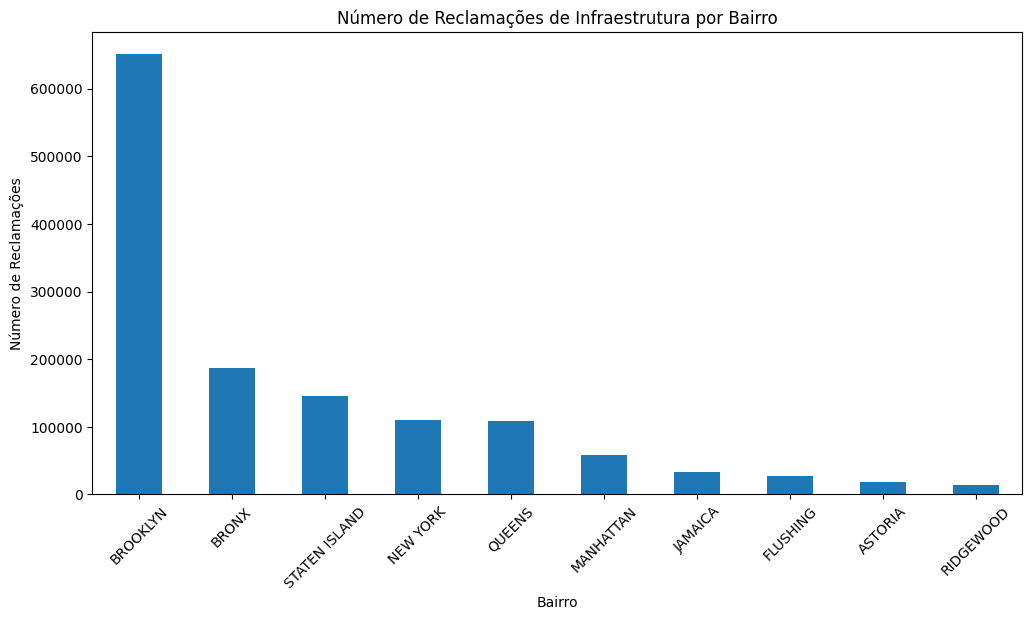

In [38]:

# Filtrar apenas os dados de infraestrutura
df_infra = df[df['Complaint Type'].isin(infra_complaints)]

# Contar as reclamações por cidade
infra_complaints_by_city = df_infra['City'].value_counts().head(10)

# Exibir os dados em um gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
infra_complaints_by_city.plot(kind='bar')
plt.title("Número de Reclamações de Infraestrutura por Bairro")
plt.xlabel("Bairro")
plt.ylabel("Número de Reclamações")
plt.xticks(rotation=45)
plt.show()


# Gráfico com a relação de reclamações de infraestrutura ao longo do tempo
Aqui conseguimos ter uma visão mais ampla dos bairros que possuem mais reclamações, respondendo diretamenta a pergunta inicial de quais bairros sofrem com mais problemas

In [ ]:
import pandas as pd
import plotly.express as px

# Lista de categorias de reclamação relacionadas à infraestrutura
infra_complaints = [
    "Street Condition", "Street Light Condition", "Sidewalk Condition", 
    "Traffic Signal Condition", "Sewer", "Building/Use", "Bridge Condition",
    "Curb Condition", "Obstruction", "Damaged Tree", "Dead/Dying Tree",
    "Overgrown Tree/Branches", "Root/Sewer/Sidewalk Condition",
    "DEP Sidewalk Condition", "DEP Street Condition", "DEP Highway Condition",
    "Highway Condition", "Highway Sign - Missing", "Highway Sign - Damaged",
    "Highway Sign - Dangling", "Street Sign - Missing", "Street Sign - Damaged",
    "Street Sign - Dangling", "Construction", "Construction Safety Enforcement",
    "Facade Insp Safety Pgm", "Unstable Building", "Tunnel Condition"
]
# Filtrar o DataFrame para incluir apenas reclamações relacionadas à infraestrutura
df_infra = df[df['Complaint Type'].isin(infra_complaints)]

# Criar uma nova coluna para o ano e mês
df_infra['Year-Month'] = df_infra['Created Date'].dt.to_period('M').astype(str)

# Criar um DataFrame para contagem de reclamações por cidade e por período
df_grouped = df_infra.groupby(['City', 'Year-Month']).size().reset_index(name='Count')

# Criar o gráfico interativo com Plotly
fig = px.bar(df_grouped,
              x='Count', 
              y='City', 
              color='City', 
              animation_frame='Year-Month', 
              title="Reclamações de Infraestrutura por Cidade ao Longo do Tempo")

fig.update_layout(
  width=1000,
  height=2000,
)
fig.show()

0   2024-12-31 23:59:38
1   2024-12-31 23:59:33
2   2024-12-31 23:59:32
3   2024-12-31 23:59:31
4   2024-12-31 23:59:21
Name: Created Date, dtype: datetime64[ns]


# Quais as reclamações mais recorrente por cada bairro

Aqui tempo uma visão mais específica das reclamações, porém ainda não datado, o que fica em aberto em quais períodos essas reclamações são mais incidentes.

In [6]:
import pandas as pd
import plotly.express as px

infra_complaints = [
    "Street Condition", "Street Light Condition", "Sidewalk Condition", 
    "Traffic Signal Condition", "Sewer", "Building/Use", "Bridge Condition",
    "Curb Condition", "Obstruction", "Damaged Tree", "Dead/Dying Tree",
    "Overgrown Tree/Branches", "Root/Sewer/Sidewalk Condition",
    "DEP Sidewalk Condition", "DEP Street Condition", "DEP Highway Condition",
    "Highway Condition", "Highway Sign - Missing", "Highway Sign - Damaged",
    "Highway Sign - Dangling", "Street Sign - Missing", "Street Sign - Damaged",
    "Street Sign - Dangling", "Construction", "Construction Safety Enforcement",
    "Facade Insp Safety Pgm", "Unstable Building", "Tunnel Condition"
]
# Filtrar apenas as reclamações de infraestrutura
df_infra = df[df['Complaint Type'].isin(infra_complaints)].copy()

# Agrupar os dados por cidade e tipo de reclamação para contar ocorrências
df_complaints_by_city = df_infra.groupby(['City', 'Complaint Type']).size().reset_index(name='Count')

# Criar gráfico interativo
fig = px.bar(
    df_complaints_by_city,
    x='Count',
    y='Complaint Type',
    color='Complaint Type',
    animation_frame='City',  # Permite alternar entre cidades
    title="Reclamações de Infraestrutura por Bairro",
    labels={'Complaint Type': 'Tipo de Reclamação', 'Count': 'Número de Reclamações', 'City': 'Cidade'}
)

# Exibir o gráfico
fig.show()


# Visão abrangente de cada bairro por período e reclamações

In [35]:
import pandas as pd
import plotly.express as px
cidades_unicas = df_infra['City'].dropna().unique()

# Lista de tipos de reclamação relacionadas à infraestrutura
infra_complaints = [
    "Street Condition", "Street Light Condition", "Sidewalk Condition", 
    "Traffic Signal Condition", "Sewer", "Building/Use", "Bridge Condition",
    "Curb Condition", "Obstruction", "Damaged Tree", "Dead/Dying Tree",
    "Overgrown Tree/Branches", "Root/Sewer/Sidewalk Condition",
    "DEP Sidewalk Condition", "DEP Street Condition", "DEP Highway Condition",
    "Highway Condition", "Highway Sign - Missing", "Highway Sign - Damaged",
    "Highway Sign - Dangling", "Street Sign - Missing", "Street Sign - Damaged",
    "Street Sign - Dangling", "Construction", "Construction Safety Enforcement",
    "Facade Insp Safety Pgm", "Unstable Building", "Tunnel Condition"
]

# Filtrar apenas as reclamações de infraestrutura
df_infra = df[df['Complaint Type'].isin(infra_complaints)].copy()

# Criar colunas para análise temporal
df_infra['Year-Month'] = df_infra['Created Date'].dt.to_period('M').astype(str)

# Permitir ao usuário selecionar um bairro para análise
bairro_escolhido = "BROOKLYN"  # Substitua pelo bairro desejado

# Filtrar dados apenas para o bairro escolhido
df_filtered = df_infra[df_infra['City'] == bairro_escolhido]

# Agrupar os dados por tipo de reclamação e período
df_complaints_filtered = df_filtered.groupby(['Complaint Type', 'Year-Month']).size().reset_index(name='Count')

# Criar gráfico interativo mostrando as reclamações ao longo do tempo
fig = px.bar(
    df_complaints_filtered,
    x='Count',
    y='Complaint Type',
    color='Complaint Type',
    animation_frame='Year-Month',  # Animação ao longo do tempo
    animation_group='Complaint Type',
    title=f"Reclamações de Infraestrutura em {bairro_escolhido} por Tipo e Tempo",
    labels={'Complaint Type': 'Tipo de Reclamação', 'Count': 'Número de Reclamações', 'Year-Month': 'Ano-Mês'}
)


# Criar dropdown rolável para seleção da cidade
dropdown_buttons = [
    dict(
        label=cidade,
        method="update",
        args=[
            {"x": [df_infra[df_infra['City'] == cidade].groupby(['Complaint Type', 'Year-Month']).size().reset_index(name='Count')['Count']],
             "y": [df_infra[df_infra['City'] == cidade].groupby(['Complaint Type', 'Year-Month']).size().reset_index(name='Count')['Complaint Type']]},
            {"title": f"Reclamações de Infraestrutura em {cidade} por Tipo e Tempo"}
        ]
    )
    for cidade in cidades_unicas
]

# Ajustar layout e adicionar dropdown rolável
fig.update_layout(
    updatemenus=[
        dict(
            buttons=dropdown_buttons,
            direction="down",
            showactive=True,
            x=0.8,
            y=1.2,
            type="dropdown",
            xanchor="left",
            yanchor="top",
            font=dict(size=12),
            bgcolor="lightgray",
            visible=True  # Permite rolagem dentro do menu
        )
    ],
    width=1200,
    height=700,
    xaxis=dict(title="Número de Reclamações"),
    yaxis=dict(title="Tipo de Reclamação", categoryorder="total ascending"),
    title=f"Reclamações de Infraestrutura em {bairro_escolhido} por Tipo e Tempo",
    barmode="group"
)

# Exibir o gráfico interativo
fig.show()


# Respondendo algumas perguntas
